In [2]:
## import the packages
import numpy as np

# Import Standard Qskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

In [3]:
## now we need to add the following  line and replace <API_Token>
IBMQ.save_account('b7b256949a73ed4e6214dd9c51ca965053d0b5017502b25deda64fcb7c7b7614852ac7fd54be93859c9d11dbfa78b48890633c54b07804850a735b1312594b0e',overwrite=True)
IBMQ.load_account()

/var/folders/lh/28k8drsd0mg7r33fz52jn_280000gn/T/ipykernel_26114/2772052217.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('b7b256949a73ed4e6214dd9c51ca965053d0b5017502b25deda64fcb7c7b7614852ac7fd54be93859c9d11dbfa78b48890633c54b07804850a735b1312594b0e',overwrite=True)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
#provider

In [6]:
provider = IBMQ.providers()
provider = IBMQ.get_provider(hub='ibm-q-education', group='harvard', project='qse-210')
#provider=IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')

In [7]:
# specify the backend
backend=provider.get_backend("ibmq_lima")

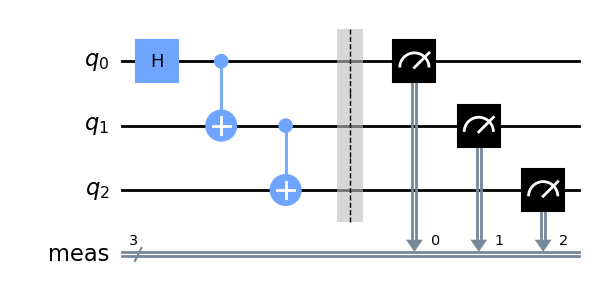

In [8]:
#Create your circuit
qc=QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()

qc.draw('mpl')

In [9]:
# executing method 1 :Manually
#mapped_circuit=transpile(qc,backend=backend)
#qobj=assemble(mapped_circuit,backend=backend,shots=1024)
#job=backend.run(qobj)

In [9]:
# executing method 2: 
job=execute(qc,backend)

In [11]:
# get your job_ id
print(job.job_id())

63a382c43c2e3c9506a54b13


In [10]:
# Now lets get the results
result=job.result()
counts=result.get_counts()

ibmqjob._wait_for_completion:ERROR:2023-04-19 16:27:51,091: Maximum retries exceeded: Error checking job status due to a network error.


IBMQJobApiError: 'Error checking job status due to a network error: "HTTPSConnectionPool(host=\'api-qcon.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/Network/ibm-q-education/Groups/harvard/Projects/qse-210/Jobs/ch03hihpiqvc4pa5itk0/status/v/1 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x7fd830b25a80>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known\'))"'

In [ ]:
counts

In [ ]:
plot_histogram(counts)